In [1]:
%load_ext autoreload
%autoreload 2

from jordan_wigner import jw_majoranas
from electronic_hamiltonian import quadratic_terms
from qiskit.quantum_info import PauliList
from tableau import spread_node, spread_node_slice, anticommutation_matrix
import random
from cost_functions import weight, quadratic_term_mean_weight, quartic_term_mean_weight
from annealing import anneal
import matplotlib.pyplot as plt

In [15]:
from electronic_hamiltonian import quartic_terms

N = 20

x, z = jw_majoranas(N)

paulis = PauliList.from_symplectic(z, x)

print("Majorana Operators:", paulis)

x_terms, z_terms = quadratic_terms(x, z, N)
quadratic_terms_paulis = PauliList.from_symplectic(z_terms, x_terms)

print("Quadratic Hamiltonian Terms:", quadratic_terms_paulis)

x_terms, z_terms = quartic_terms(x, z, N)
quartic_terms_paulis = PauliList.from_symplectic(z_terms, x_terms)

print("Quartic Hamiltonian Terms:", quartic_terms_paulis)

print(f"Average Weight: {weight(x, z)}")

Majorana Operators: ['IIIIIIIIIIIIIIIIIIIX', 'IIIIIIIIIIIIIIIIIIXZ', 'IIIIIIIIIIIIIIIIIXZZ',
 'IIIIIIIIIIIIIIIIXZZZ', 'IIIIIIIIIIIIIIIXZZZZ', 'IIIIIIIIIIIIIIXZZZZZ',
 'IIIIIIIIIIIIIXZZZZZZ', 'IIIIIIIIIIIIXZZZZZZZ', 'IIIIIIIIIIIXZZZZZZZZ',
 'IIIIIIIIIIXZZZZZZZZZ', 'IIIIIIIIIXZZZZZZZZZZ', 'IIIIIIIIXZZZZZZZZZZZ',
 'IIIIIIIXZZZZZZZZZZZZ', 'IIIIIIXZZZZZZZZZZZZZ', 'IIIIIXZZZZZZZZZZZZZZ',
 'IIIIXZZZZZZZZZZZZZZZ', 'IIIXZZZZZZZZZZZZZZZZ', 'IIXZZZZZZZZZZZZZZZZZ',
 'IXZZZZZZZZZZZZZZZZZZ', 'XZZZZZZZZZZZZZZZZZZZ', 'IIIIIIIIIIIIIIIIIIIY',
 'IIIIIIIIIIIIIIIIIIYZ', 'IIIIIIIIIIIIIIIIIYZZ', 'IIIIIIIIIIIIIIIIYZZZ',
 'IIIIIIIIIIIIIIIYZZZZ', 'IIIIIIIIIIIIIIYZZZZZ', 'IIIIIIIIIIIIIYZZZZZZ',
 'IIIIIIIIIIIIYZZZZZZZ', 'IIIIIIIIIIIYZZZZZZZZ', 'IIIIIIIIIIYZZZZZZZZZ',
 'IIIIIIIIIYZZZZZZZZZZ', 'IIIIIIIIYZZZZZZZZZZZ', 'IIIIIIIYZZZZZZZZZZZZ',
 'IIIIIIYZZZZZZZZZZZZZ', 'IIIIIYZZZZZZZZZZZZZZ', 'IIIIYZZZZZZZZZZZZZZZ',
 'IIIYZZZZZZZZZZZZZZZZ', 'IIYZZZZZZZZZZZZZZZZZ', 'IYZZZZZZZZZZZZZZZZZZ',
 'YZZZZZZZZZZZZZZZZZZZ']
Quadra

T0 = 40
Iteration 0 10.2
Iteration 1 10.056140350877193
Iteration 11 9.89907120743034
Iteration 20 9.740144478844169
Iteration 24 9.62827657378741
Iteration 29 9.327760577915377
Iteration 33 9.198761609907121
Iteration 393 8.840866873065016
Iteration 645 8.646026831785345
Iteration 651 8.535603715170279
Iteration 660 8.530856553147574
Iteration 1202 8.365737874097007
Iteration 1226 7.780598555211558
Iteration 1239 7.454489164086687
Iteration 9936 7.304024767801858
Iteration 10823 7.2747162022703815
Iteration 10826 7.001031991744066
Iteration 10833 6.674716202270382
Iteration 10876 6.580804953560372
Iteration 10913 6.2369453044375645
Iteration 12299 6.143034055727554
Iteration 12509 6.056965944272446
Iteration 12678 5.943034055727554


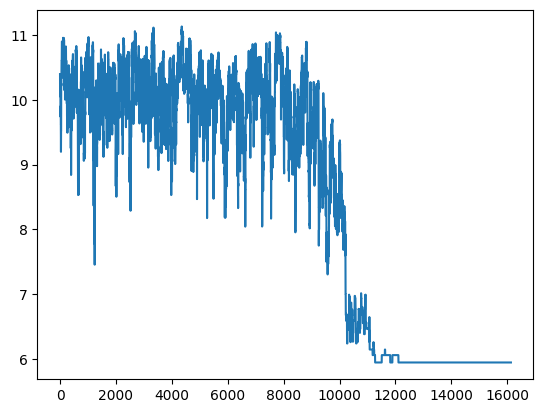

In [16]:
x, z, energies, energy_opt = anneal(x, z, explore=spread_node, energy=quartic_term_mean_weight, cooling_rate=0.9995)

paulis = PauliList.from_symplectic(z, x)

plt.plot(energies)

In [9]:
anticommutation_matrix(x, z)

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1,